In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('placement.csv')

In [5]:
df.shape

(1000, 3)

In [6]:
df.sample(5)

,cgpa,placement_exam_marks,placed
316,7.07,38.0,1
717,6.49,21.0,0
983,6.81,11.0,1
419,6.22,46.0,0
277,6.45,15.0,1


<h2 style='color:#DE006F'>PLOTTING THE DISTRIBUTION</h2>

C:\Users\HP\AppData\Local\Temp\ipykernel_17016\718610629.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'],color='#B00058')
C:\Users\HP\AppData\Local\Temp\ipykernel_17016\718610629.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'],color='#B00058')


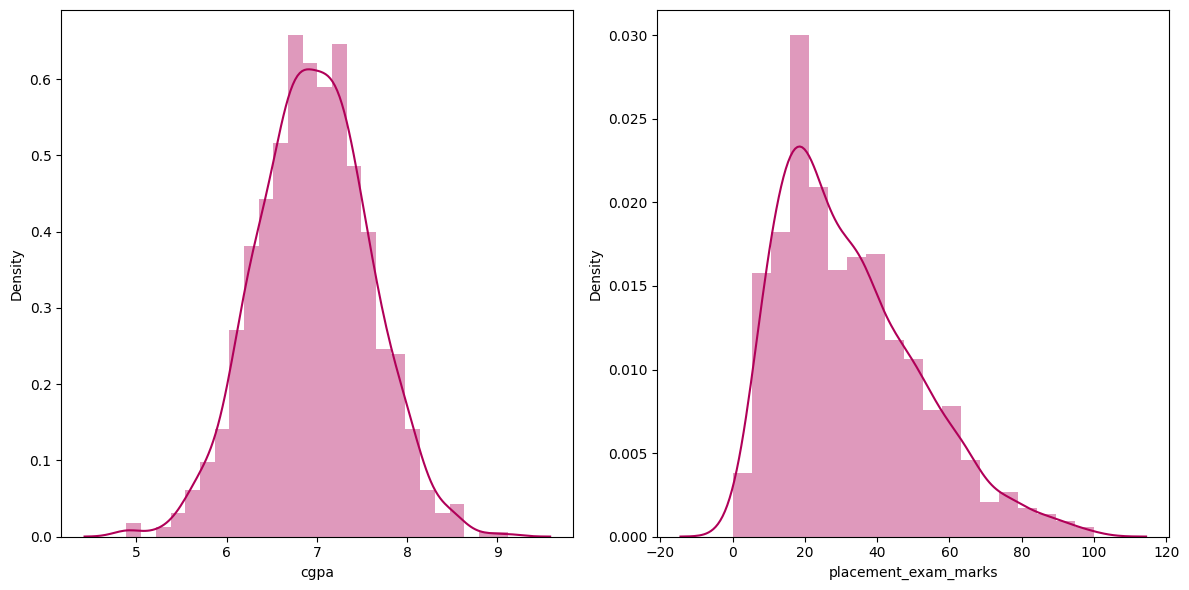

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'],color='#B00058')

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'],color='#B00058')

plt.tight_layout()
plt.show()

#we can see that 'placement_exam_marks' is skewed

In [9]:
df['placement_exam_marks'].skew()
#thus it is rightly skewed

0.8356419499466834

<h2 style='color:#DE006F'>STATISTICAL ANALYSIS</h2>

In [10]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<h2 style='color:#DE006F'>PLOTTING A BOX PLOT</h2>

<Axes: ylabel='placement_exam_marks'>

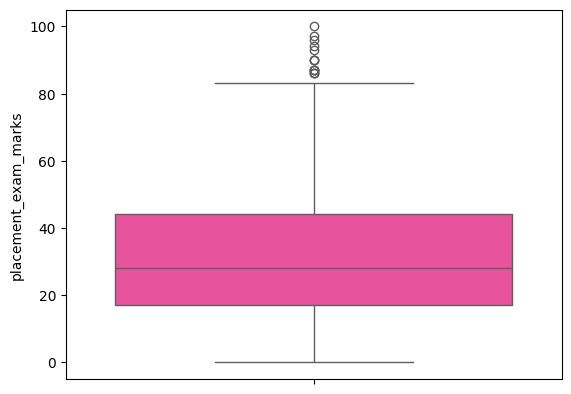

In [13]:
sns.boxplot(df['placement_exam_marks'],color='#FF3B9D')

<h2 style='color:#DE006F'>FINDING THE IQR</h2>

In [18]:
percentile25=df['placement_exam_marks'].quantile(.25)
percentile75=df['placement_exam_marks'].quantile(0.75)

percentile25, percentile75

(17.0, 44.0)

In [19]:
IQR=percentile75 - percentile25
IQR

27.0

<h2 style='color:#DE006F'>IQR PROXIMITY RULE</h2>

In [20]:
upper_limit=percentile75 + 1.5 * IQR
lower_limit=percentile25 - 1.5 * IQR

upper_limit, lower_limit

(84.5, -23.5)

<h2 style='color:#DE006F'>FINDING THE OUTLIERS</h2>

In [28]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [23]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


<h4 style='color:red'>REMOVING OUTLIERS BY TRIMMING</h4>

In [26]:
new_df=df[(df['placement_exam_marks'] < upper_limit) & (df['placement_exam_marks'] > lower_limit)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<h4 style='color:red'>REMOVING OUTLIERS BY CAPPING</h4>

In [30]:
new_df_cap=df.copy()
new_df_cap.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [31]:
new_df_cap['placement_exam_marks']=np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
    
)

In [33]:
new_df_cap.shape
#Still, there are 1000 rows as no rows have been deleted, the values have just been capped

(1000, 3)